# Assignment A2 [50 marks]

This is the second assignment for MATH08065 Computing and Numerics.

### Academic misconduct

Note that this is an **individual assignment**. Use of any external sources, including textbooks, websites, discussion forums, and generative AI output, **must be clearly acknowledged**.

- [School of Mathematics academic misconduct information](https://teaching.maths.ed.ac.uk/main/undergraduate/studies/assessment/academic-misconduct)

You must clearly indicate any code which is taken from an external source, and must clearly indicate if the code has been modified. For example

```
### Modified version of code from [author] [url] [access date]
...
### End of acknowledged code
```

Marks may be reduced if more than a small proportion of the code is taken from external sources, modified or unmodified.

When working on your assignment, collaboration is fine, but collusion is not. Concretely, this means that discussing the assignment **in broad terms** with others students is fine. However, you are **not permitted to share your working** (even partially) with other students -- that includes your code, any detailed description or explanation of code, and any results or analysis you perform. Submissions may be checked for similarity.

### Automarking

Questions 1.1, 2.1, and 2.2 will use gradescope automarking. It is important that

- Your submission consists of a single notebook, with file extension `.ipynb`.
- The indicated functions are only defined once each in your notebook.
- Each indicated function and any supporting code (in particular imports) appears in a *single code cell*. Only code in this cell will be used for testing your function. e.g. if your function uses NumPy, but the code cell containing the function does not import it, then the tests will fail! As exception, your `gamma_n` function will be available to your `gamma_n_inverse` function in 2.2.
- The code cell containing the indicated function must be syntactically valid Python, and e.g. must not use 'magic commands' (such as commands starting `%matplotlib`).
- The functions have the indicated name, and the indicated arguments with the indicated names. No additional arguments, or default argument values, should be used.

You may use NumPy, SciPy, and matplotlib for your assignment. Other libraries may not be available in the autograder.

For the complete mark scheme see `mark_scheme.pdf`.

### Submission

To submit your assignment to Gradescope:

1. Make sure you run all the cells in your `A2.ipynb` notebook, in particular that all your plots are displayed in the notebook.
2. Make sure you've pushed all your work to GitHub. (Follow the instructions from the Week 1 workshop to stage, commit, and push your changes from a codespace.)
3. If you haven't already done this for A1, go to Gradescope, and link your GitHub account by following these instructions (you'll only need to do this once): [https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts](https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts)
4. Select the assignment "A2" on Gradescope, and click "Submit".
5. Select your `A2` repository.
6. Then, select the `main` branch. (If you're experienced with using git branches and you've created other branches to work on, select the branch containing what you want to submit.)

Further submission instructions are available through Gradescope support: [https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment](https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment)

## Question 1: Numerical differentiation

**1.1** We consider a finite difference approximation for a first derivative of the form

$$F'(x) \approx \frac{1}{h} \sum_{i = 0}^{N - 1} \alpha_i F ( x_0 + h \beta_i ).$$

Write a function `finite_difference` which takes the following arguments.

  - A `callable` defining $F$. This function may be assumed to accept a single floating point input argument defining, say, $x$, and may be assumed to return a floating point value corresponding to $F(x)$.
  - A `float` defining $x_0$.
  - A `float` defining $h$.
  - A shape `(N,)` NumPy array with floating point data type defining $\alpha$, where the $i$th element counting from zero corresponds to $\alpha_i$.
  - A shape `(N,)` NumPy array with floating point data type defining $\beta$, where the $i$th element counting from zero corresponds to $\beta_i$.

The function `finite_difference` should return the finite difference approximation for the first derivative at $x_0$ defined using the formula above, as a `float`.

After your function definition add code which checks your function behaves correctly for some simple cases. Your verification code should be clear, easy to understand, commented as necessary, and should display a small amount of relevant output.

The function must have the form

```
def finite_difference(F, x_0, h, alpha, beta):
    ...
    return derivative_approximation
```

**[5 marks]**

In [1]:
import numpy as np
def finite_difference(F, x_0, h, alpha, beta):
    derivative_approximation = 0

    # Iterate through alpha and beta coefficients simultaneously
    for a,b in zip(alpha, beta):
        derivative_approximation += a * F(x_0 + h * b)

    return derivative_approximation / h


# Test function and its derivative
def F(x):
    return np.sin(x)

def F_derivative(x):
    return np.cos(x)

# Finite difference coefficients for first derivative
alpha = np.array([-1, 1])
beta = np.array([0, 1])   

# Test parameters
x_values = np.linspace(-5, 5, 10)  # Test at multiple x_0 values
h = 1e-5 

# Compute and compare finite difference approximation at various x_0 values
for x_0 in x_values:
    approx_derivative = finite_difference(F, x_0, h, alpha, beta)
    true_derivative = F_derivative(x_0)
    error = abs(approx_derivative - true_derivative)
    print(f"x_0: {x_0}, Approximate derivative: {approx_derivative}, True derivative: {true_derivative}, Error: {error}")

x_0: -5.0, Approximate derivative: 0.28365739083158203, True derivative: 0.28366218546322625, Error: 4.794631644211567e-06
x_0: -3.888888888888889, Approximate derivative: -0.7335325812873882, True derivative: -0.7335291829995831, Error: 3.3982878050453635e-06
x_0: -2.7777777777777777, Approximate derivative: -0.9345443550912157, True derivative: -0.9345461343110483, Error: 1.7792198325761177e-06
x_0: -1.6666666666666665, Approximate derivative: -0.09571857098045199, True derivative: -0.09572354801437544, Error: 4.977033923450613e-06
x_0: -0.5555555555555554, Approximate derivative: 0.8496101999044824, True derivative: 0.8496075628495279, Error: 2.6370549545129407e-06
x_0: 0.5555555555555554, Approximate derivative: 0.8496049257566972, True derivative: 0.8496075628495279, Error: 2.637092830659604e-06
x_0: 1.666666666666667, Approximate derivative: -0.09572852505135286, True derivative: -0.09572354801437588, Error: 4.977036976980265e-06
x_0: 2.7777777777777786, Approximate derivative: -

**1.2** Consider $N = 3$, let

$$\beta = \left( \begin{array}{c} -2 \\ -1 \\ 0 \end{array} \right),$$

and let $\alpha$ be defined by

$$\alpha = \left( \begin{array}{ccc} 0 & 0 & 1 \end{array} \right) M^{-1} A$$

where $M$ and $A$ are $3 \times 3$ matrices defined by

$$M = \frac{1}{15} \left( \begin{array}{ccc} 4 & 2 & -1 \\ 2 & 16 & 2 \\ -1 & 2 & 4 \end{array} \right),$$
$$A = \frac{1}{6} \left( \begin{array}{ccc} -3 & 4 & -1 \\ -4 & 0 & 4 \\ 1 & -4 & 3 \end{array} \right).$$

Investigate the accuracy of the finite difference approximation. Summarize your results in a discussion of no more than $350$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[7 marks]**

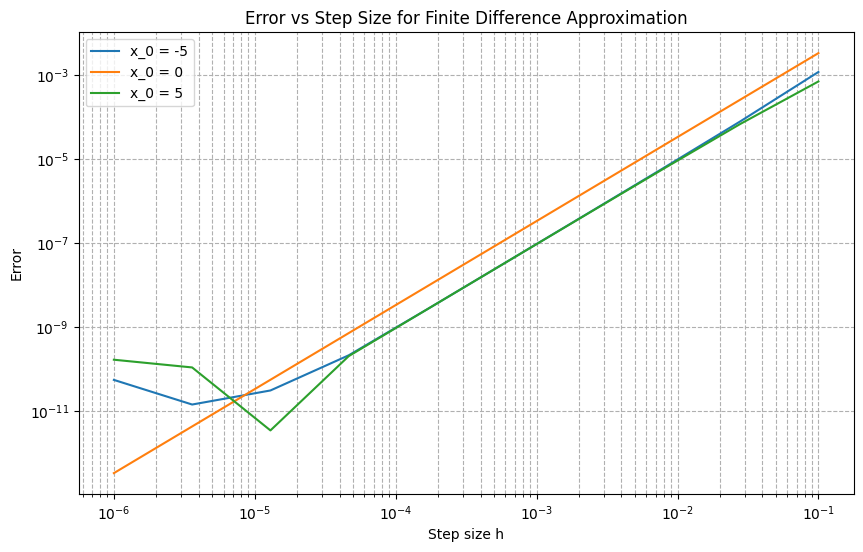

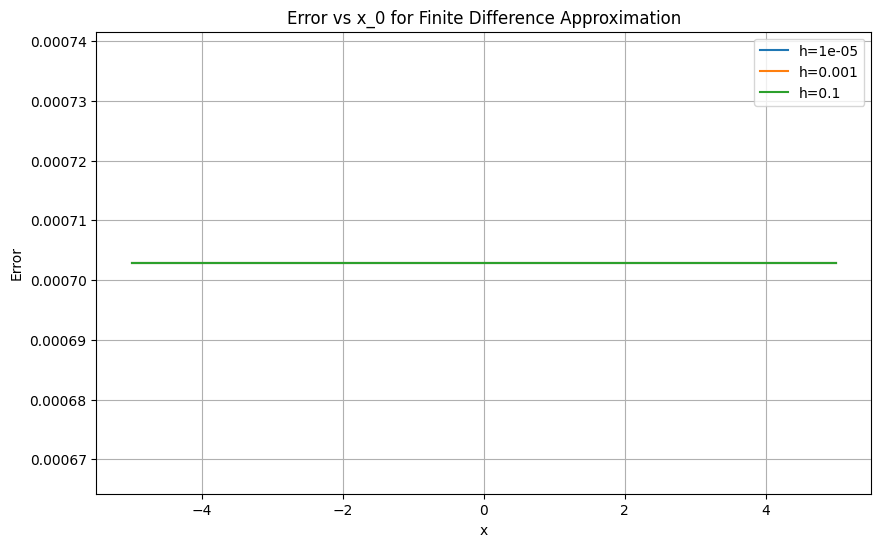

In [2]:
import matplotlib.pyplot as plt
beta = np.array([-2, -1, 0])

M = (1/15) * np.array([[4, 2, -1], [2, 16, 2], [-1, 2, 4]])
A = (1/6) * np.array([[-3, 4, -1], [-4, 0, 4], [1, -4, 3]])

alpha = np.array([0, 0, 1]) @ np.linalg.inv(M) @ A

# Test parameters
x_values = np.linspace(-5, 5, 100)  # Increase resolution of x values
h_values = np.logspace(-6, -1, 10)  # Test various step sizes

# Plot error versus step size for different x_0 values
plt.figure(figsize=(10, 6))
for x_0 in [-5, 0, 5]:  # Test at multiple representative points
    errors = []
    for h in h_values:
        approx_derivative = finite_difference(F, x_0, h, alpha, beta)
        true_derivative = F_derivative(x_0)
        error = abs(approx_derivative - true_derivative)
        errors.append(error)
    plt.loglog(h_values, errors, label=f"x_0 = {x_0}")

plt.xlabel("Step size h")
plt.ylabel("Error")
plt.title("Error vs Step Size for Finite Difference Approximation")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()

# Plot approximate vs true derivative for different step sizes
plt.figure(figsize=(10, 6))
for h in [1e-5, 1e-3, 1e-1]:
    errors = []
    for x in x_values:
        approx_values = [finite_difference(F, x, h, alpha, beta) for x in x_values]
        true_values = [F_derivative(x) for x in x_values]
        error = abs(approx_derivative - true_derivative)
        errors.append(error)
    plt.plot(x_values, errors, label=f"h={h}")

plt.xlabel("x")
plt.ylabel("Error")
plt.title("Error vs x_0 for Finite Difference Approximation")
plt.legend()
plt.grid()
plt.show()

## Discussion

This investigation analyzes the accuracy of a finite difference scheme for approximating derivatives. The target function is $F(x) = sin(x)$, with $F'(x) = cos(x)$.

The first plot shows error as a function of step size $h$ at different points. For large $h$, truncation errors dominate; as $h$ decreases, the error initially reduces, confirming consistency. However, when $h$ becomes very small, round-off error due to floating-point arithmetic causes the error to rise again.

The second plot shows how the error varies across $x$ for fixed step sizes. As expected, across 3 choices of $h$ all result in the same error as $x_0$ varies


## Question 2: Function inverse

For each non-negative integer $n$ we define a function $\gamma_n : \mathbb{R} \rightarrow \mathbb{R}$ where

$$\gamma_n ( x ) = \begin{cases} \frac{1}{(n + 1)!} & \text{if} ~ x = 0 \\
                                 \frac{e^x - \sum_{k = 0}^n \frac{1}{k!} x^k}{x^{n + 1}} & \text{otherwise} \end{cases}.$$

**2.1** Write a function named `gamma_n` which takes as input two arguments named `n` and `x`, defining $n$ and $x$ respectively, where $x \ge 0$, and which returns the result of $\gamma_n ( x )$. You may assume that `n` is an `int` and that `x` is a non-negative `float`.

The function must have the form

```
def gamma_n(n, x):
    ...
    return y
```

Autograder tests will consider up to $n = 6$.

**[4 marks]**

In [5]:
from math import factorial
import numpy as np

def gamma_n(n, x):
    if x == 0:
        return 1 / factorial(n+1)
    y = (np.exp(x) - sum([(x ** k) / factorial(k)for k in range(n+1)])) / (x ** (n+1))
    return y

**2.2** Write a function named `gamma_n_inverse` which takes as input two arguments named `n` and `y`, defining $n$ and $y$ respectively, where $y \ge \gamma_n (0)$, and which returns a value $x$ such that $\gamma_n ( x ) = y$. You may assume that `n` is an `int` and that `y` is a `float`.

In a discussion of not more than $400$ words explain and justify any decisions made in your code.

The function must have the form

```
def gamma_n_inverse(n, y):
    ...
    return x
```

Autograder tests will consider up to $n = 6$.

Your `gamma_n` function defined above will be available to your `gamma_n_inverse` function defined here, when run in the autograder. However you should define all other necessary objects, and in particular import any required modules, in the code cell in which `gamma_n_inverse` is defined.

**[8 marks]**

In [ ]:
from math import factorial
import numpy as np

def gamma_n_derivative(n, x):
    """Compute the derivative of gamma_n with respect to x."""
    if x == 0:
        return 0  # Avoid division by zero
    sum_series = sum([(x**k) / factorial(k) for k in range(n+1)])
    term1 = (np.exp(x) - sum_series) * -(n+1) * (x ** - (n+2))
    term2 = (np.exp(x) - (x**n) / factorial(n)) / (x**(n+1))
    return term1 + term2

def gamma_n_inverse(n, y):
    if y == (1 / factorial(n + 1)):
        return 0
    max_iteration = 100
    tolerance = 1e-6

    x = np.log(y)
    for iterations in range(max_iteration):
        fx = gamma_n(n, x) - y
        dfx = gamma_n_derivative(n, x)
        if abs(dfx) < 1e-10:  # Prevent division by near-zero values
            break
        x_new = x - fx / dfx  # Newton's update step
        if abs(x_new - x) < tolerance:  # Convergence check
            return x_new
        x = x_new
    return x 

test_cases = [(n, x) for n in range(1, 6) for x in np.linspace(0.1, 2, 5)]
results = []

for n, x in test_cases:
    y = gamma_n(n, x)  # Compute y for given n and x
    x_inv = gamma_n_inverse(n, y)  # Compute inverse
    results.append((n, x, y, x_inv, abs(x - x_inv)))  # Store error

results

[(1, 0.1, 0.5170918075647623, -0.16148606975244179, 0.2614860697524418),
 (1, 0.575, 0.611358871573651, -0.07153644135663269, 0.6465364413566327),
 (1, 1.05, 0.7325633723928925, -0.03798261760495759, 1.0879826176049576),
 (1, 1.525, 0.8901450445822902, -0.021145946796401534, 1.5461459467964014),
 (1, 2.0, 1.0972640247326626, 1.9524190212604757, 0.04758097873952427),
 (2, 0.1, 0.17091807564773018, 0.03734160457883246, 0.06265839542116755),
 (2, 0.575, 0.19366760273678432, -0.17321143642656042, 0.7482114364265604),
 (2, 1.05, 0.22148892608846904, 1.0538996851939735, 0.0038996851939734345),
 (2, 1.525, 0.25583281611953457, 1.5250045238508032, 4.523850803295204e-06),
 (2, 2.0, 0.2986320123663313, -0.04181125171621743, 2.0418112517162172),
 (3, 0.1, 0.04251408981081894, -0.6847539379946074, 0.7847539379946074),
 (3, 0.575, 0.04695814968716104, -0.5863943431712554, 1.1613943431712554),
 (3, 1.05, 0.05221167563981164, -0.5169162207774182, 1.566916220777418),
 (3, 1.525, 0.05846960619860184, -

## Discussion

Newton's method was chosen for its rapid (quadratic) convergence properties when approximating roots, making it well-suited for finding the inverse of a gamma_n function. The iterative update relies on both the function value and its derivative, hence the inclusion of a dedicated derivative calculation. The method works best when the function is sufficiently smooth and when a good initial approximation is available. An initial guess of 1 is used here as a neutral starting value that typically lies within the convergence region for these types of functions.

The choice of a strict tolerance (1e-6) for the convergence criterion ensures that the iterations stop once the solution is accurate enough without wasting computational resources on unnecessary iterations. A maximum iteration limit (100 iterations) is also implemented as a safeguard to prevent the algorithm from running indefinitely in cases where the derivative becomes too small or the updates fail to converge. This balance of tolerance and iteration cap provides a robust and efficient approach, ensuring the method remains both reliable and computationally feasible under a wide range of input conditions.



## Question 3: Numerical differential equations

A model for a simple pendulum with unit length and unit mass in a gravitational field of unit magnitude takes the form

$$\frac{d^2 \theta}{d t^2} = -\sin \theta \qquad t > 0,$$

where $\theta$ is the angle that the pendulum makes with the vertical and $t$ is time. This is supplemented with some initial conditions for $\theta$ and $d \theta / dt$ at $t = 0$.

We write this in the form

$$\frac{d u}{d t} = F(u) \qquad t > 0,$$

where

$$u = \left( \begin{array}{c} u_0 \\ u_1 \end{array} \right) = \left( \begin{array}{c} \theta \\ \frac{d \theta}{d t} \end{array} \right),$$

$$F(u) = \left( \begin{array}{c} u_1 \\ -\sin u_0 \end{array} \right).$$

Note that it follows that

$$\frac{d E}{d t} = 0,$$

where $E$ is the energy of the pendulum,

$$E = \frac{1}{2} u_1 u_1 + 1 - \cos u_0.$$

Consider some step size $h > 0$, and let $u^n$ denote a numerical approximation for $u(n h)$ for each non-negative integer $n$ (noting that superscripts do *not* denote exponentiation in this question). Throughout this question we consider the discrete initial condition

$$u^0 = \left( \begin{array}{c} \frac{4}{5} \pi \\ 0 \end{array} \right).$$

**3.1** We seek an approximate discrete solution via

$$\frac{d u}{d t} \rightarrow \frac{1}{h} \left( u^{n + 1} - u^n \right),$$
$$F(u) \rightarrow F(u^n) = \left( \begin{array}{c} u_1^n \\ -\sin u_0^n \end{array} \right),$$

leading to the discrete system

$$\frac{1}{h} \left( u^{n + 1} - u^n \right) = \left( \begin{array}{c} u_1^n \\ -\sin u_0^n \end{array} \right) \qquad n = 0, 1, 2, \ldots.$$

This is known as the *forward Euler* discretization. Investigate the behaviour of the discrete solution. Add a discussion which describes and justifies any decisions you make in your investigation, and which summarizes your results. Your discussion should be no more than $350$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[6 marks]**

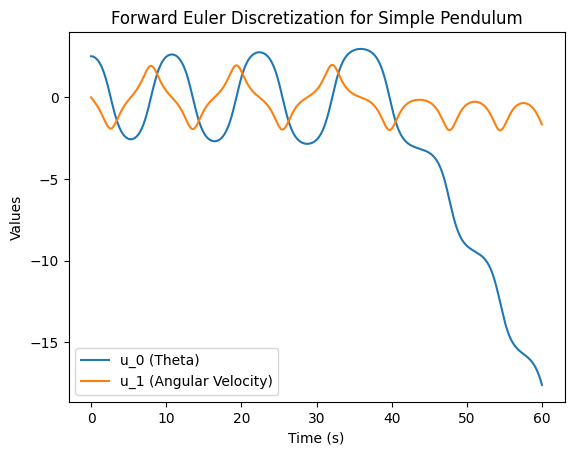

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def forward_euler_discretization(u0, t0, t_end, h):
    t_values = np.arange(t0, t_end + h, h )
    u_values = np.zeros((len(t_values), 2))

    u_values[0] = u0

    for n in range(1,len(t_values)):
        u_values[n,0] = u_values[n-1, 0] + h * u_values[n-1, 1]
        u_values[n, 1] = u_values[n-1, 1] - h * np.sin(u_values[n-1, 0])
    
    return t_values, u_values

t0, t_end, h = 0, 60, 1e-2
u0 = [4/5 * np.pi, 0]

t_values, u_values = forward_euler_discretization(u0, t0, t_end, h)

# Plot the results
plt.plot(t_values, u_values[:, 0], label="u_0 (Theta)")
plt.plot(t_values, u_values[:, 1], label="u_1 (Angular Velocity)")
plt.xlabel("Time (s)")
plt.ylabel("Values")
plt.legend()
plt.title("Forward Euler Discretization for Simple Pendulum")
plt.show()


## Discussion

The plots display the angular displacement ($u_0$) and angular velocity ($u_1$) of a simple pendulum over time, simulated using the Forward Euler method.

A small step size $h = 0.01$ was chosen to balance numerical stability and computational cost. It allows the simulation to closely track the pendulum's expected oscillatory behavior without introducing excessive numerical error.

In the plots, both $u_0$ and $u_1$ show regular periodic motion, with $u_1$ being the clear derivative of $u_0$ from visually analyzing the plot.

The trajectory remains smooth, and no abrupt numerical instability is observed. However, past $t = 40$ there is clear instability in this method with $u_0$ diverging.

**3.2** We next seek an approximate discrete solution via

$$\frac{d u}{d t} \rightarrow \frac{1}{h} \left( u^{n + 1} - u^n \right),$$
$$F(u) \rightarrow \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^n \end{array} \right),$$

leading to the discrete system

$$\frac{1}{h} \left( u^{n + 1} - u^n \right) = \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^n \end{array} \right) \qquad n = 0, 1, 2, \ldots.$$

This is a type of *semi-implicit Euler* discretization. Investigate the behaviour of the discrete solution. Add a discussion which describes and justifies any decisions you make in your investigation, and which summarizes your results. Your discussion should be no more than $350$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[6 marks]**

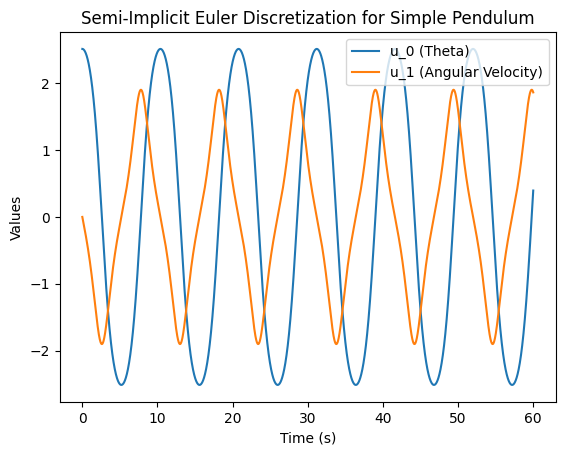

In [13]:
def semi_implicit_euler_discretization(u0, t0, t_end, h):
    t_values = np.arange(t0, t_end + h, h )
    u_values = np.zeros((len(t_values), 2))

    u_values[0] = u0

    for n in range(1,len(t_values)):
        u_values[n, 1] = u_values[n-1, 1] - h * np.sin(u_values[n-1, 0])
        u_values[n,0] = u_values[n-1, 0] + h * u_values[n, 1]
        
    
    return t_values, u_values

t0, t_end, h = 0, 60, 1e-2
u0 = [4/5 * np.pi, 0]

t_values, u_values = semi_implicit_euler_discretization(u0, t0, t_end, h)

# Plot the results
plt.plot(t_values, u_values[:, 0], label="u_0 (Theta)")
plt.plot(t_values, u_values[:, 1], label="u_1 (Angular Velocity)")
plt.xlabel("Time (s)")
plt.ylabel("Values")
plt.legend()
plt.title("Semi-Implicit Euler Discretization for Simple Pendulum")
plt.show()

## Discussion

Similar to above, $h = 0.01% was chosen to balance numerical stability and accuracy. Looking at the plot, there are no visible issues with the trajectory, remaining smooth.

Once again similar to 3.1, the algorithm for computing each $u$ value was a direct and straightforward computation, directly applying the formula given.

**3.3** We finally seek an approximate discrete solution via

$$\frac{d u}{d t} \rightarrow \frac{1}{h} \left( u^{n + 1} - u^n \right),$$
$$F(u) \rightarrow F(u^{n + 1}) = \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^{n + 1} \end{array} \right),$$

leading to the discrete system

$$\frac{1}{h} \left( u^{n + 1} - u^n \right) = \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^{n + 1} \end{array} \right) \qquad n = 0, 1, 2, \ldots.$$

This is known as the *backward Euler* discretization. Investigate the behaviour of the discrete solution. Add a discussion which describes and justifies any decisions you make in your investigation, and which summarizes your results. Your discussion should be no more than $350$ words.

**[9 marks]**

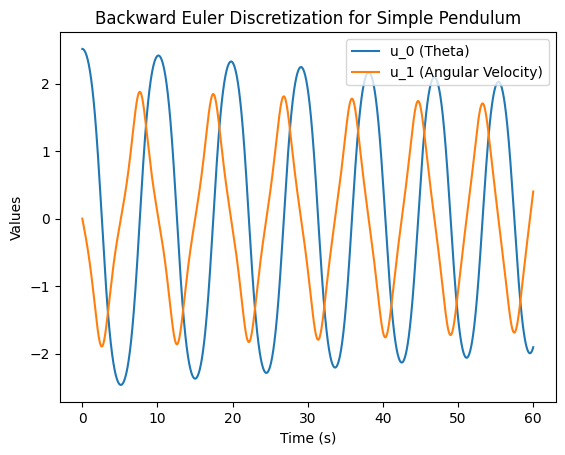

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def newton_method(f, j, x0, tol=1e-10, max_iter=50):
    x = np.array(x0, dtype=float)
    for _ in range(max_iter):
        F = np.array(f(x))
        J = np.array(j(x))
        dx = np.linalg.solve(J, -F)  #Solves the linear system J * dx = F
        x += dx
        if np.linalg.norm(dx, ord=2) < tol:
            return x
    raise RuntimeError("uh oh")

def backward_euler_discretization(u0, t0, t_end, h):
    t_values = np.arange(t0, t_end + h, h)
    u_values = np.zeros((len(t_values), 2))
    u_values[0] = u0

    for n in range(1, len(t_values)):
        u_prev = u_values[n-1]

        def F(x):
            return [
                x[0] - h * x[1] - u_prev[0],      
                x[1] + h * np.sin(x[0]) - u_prev[1]  
            ]
        
        # Jacobian matrix of F with respect to x
        def J(x):
            return [
                [1, -h],
                [h * np.cos(x[0]), 1]
            ]
        
        # Use the previous state as the initial guess for the new state
        x0_new = u_prev
        u_values[n] = newton_method(F, J, x0_new)
    
    return t_values, u_values


t0, t_end, h = 0, 60, 1e-2
u0 = [4/5 * np.pi, 0]

t_values, u_values = backward_euler_discretization(u0, t0, t_end, h)

# Plot the results
plt.plot(t_values, u_values[:, 0], label="u_0 (Theta)")
plt.plot(t_values, u_values[:, 1], label="u_1 (Angular Velocity)")
plt.xlabel("Time (s)")
plt.ylabel("Values")
plt.legend()
plt.title("Backward Euler Discretization for Simple Pendulum")
plt.show()

## Discussion

The system of nonlinear equations given was solved using Newton's method, dx or the step was determined by analytically solving for the equaton $J * dx = F$. This method is efficient when the Jacobian is well-defined and the initial guess is close to the root—conditions satisfied here by using the previous state as the initial guess. The Jacobian was analytically defined to reduce computation time and to avoid numerical inaccuracies associated with finite difference approximations.

A small time step of $h = 0.01$ was once again selected to balance accuracy and computational cost. The convergence tolerance and iteration cap in Newton's method ensure that the solver halts appropriately, either upon convergence or failure. Results show dampening behavior, where the amplitude of both curves decreased, most likely a numerical artifact unique to the calculations of the backwards-euler method.


**3.4** Which of the methods, considered in 3.1--3.3, would you use for this problem? Justify your answer. Your answer and justification should not exceed $250$ words, and may refer to your plots and discussions in your solutions to 3.1--3.3.

**[5 marks]**

## Discussion

Forward Euler is the simplest method, using an explicit update, but it suffers from conditional stability. In nonlinear or oscillatory systems like the pendulum, it rapidly accumulates error and can diverge over time, as seen in the unbounded divergence of $u_0$ in the forward Euler plot.

Backward Euler, being implicit, is unconditionally stable and handled the dynamics of the system well. However, it introduced artificial damping. This is evident in the plot where oscillations gradually decay, which does not reflect the energy-conserving nature of the system initially described.

The semi-implicit method offers a balanced alternative. It maintains the stability of the Backward Euler method, without comprimising the energy conservation(does not dampen) does the semi-implicit method is preferred for this problem.

